# Extra Practise

For an optional bit of "on your own" practise, lets take this Kaggle Pokemon dataset (https://www.kaggle.com/abcsds/pokemon) and try and answer a few questions visually:

1. What does the Attack vs Defense distribution look like? 
    1. Advanced: Break it down by Type
2. What are the top 10 pokemon by summed attributes?
    1. Can you modify the load in code and do this for a different generation, or only for "Mega" pokemon?
3. What are the distributions of battle states (HP, attack through to speed)?
    1. Even better, what are the distributions, by type of pokemon, for the above question

Download the data, and this code should get you started. Remember that there are a thousand ways to answe these questions. If your solution looks completely different to mine, that's fine! I'm going to quickly restrict the data and only look at Gen1 Pokemon without the "Mega" label for simplicity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import numpy as np

df = pd.read_csv("Pokemon.csv")
# Filtering on the data. Don't get caught up on this, we'll cover it very soon!
df = df[df.Generation == 1 & ~df.Name.str.contains("Mega")]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


## Pokemon Attack and Defense Correlation

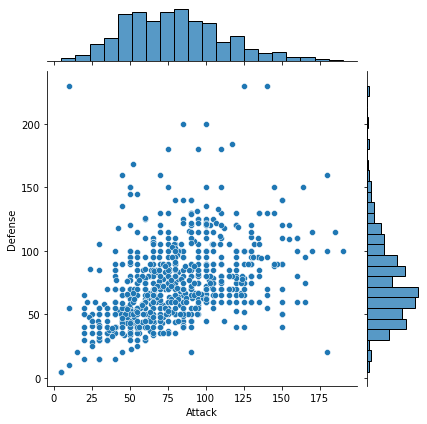

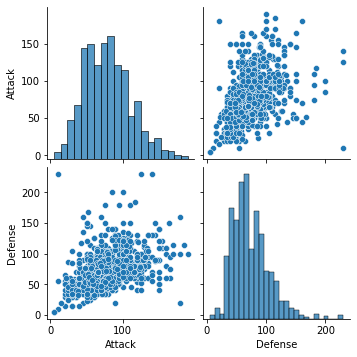

In [33]:
# your code here
# df.plot.scatter(x="Attack",y="Defense")
# sb.jointplot(data=df, x="Attack", y="Defense", kind="kde");
sb.jointplot(data=df, x="Attack", y="Defense");
sb.pairplot(data=df[["Attack", "Defense"]]);

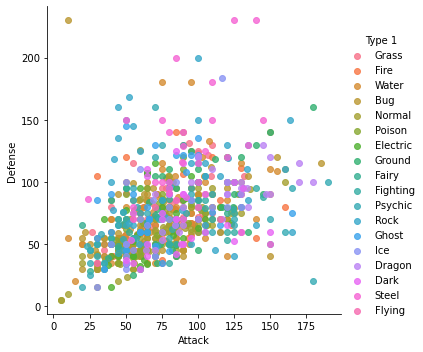

In [28]:
sb.lmplot(x="Attack", y="Defense", hue="Type 1", data=df, fit_reg=False);

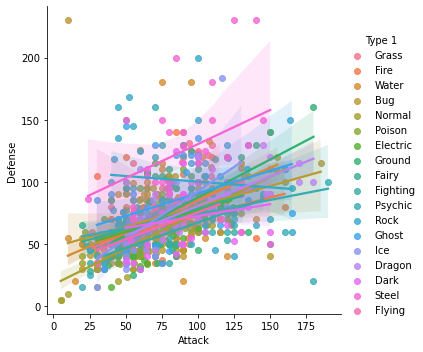

In [29]:
sb.lmplot(x="Attack", y="Defense", hue="Type 1", data=df, fit_reg=True);

## Strongest Pokemon by Summed Stats

<AxesSubplot:xlabel='Name'>

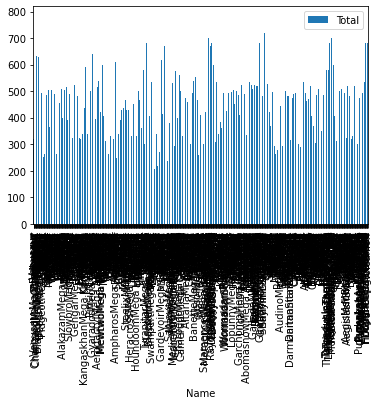

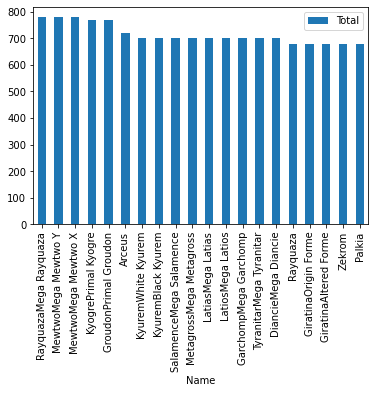

In [59]:
# your code here
df.plot.bar(x="Name",y="Total")
# top 20 pokemon
df.sort_values(by="Total", ascending=False).iloc[:20].plot.bar(x="Name",y="Total")

## Distribution of Battle stats

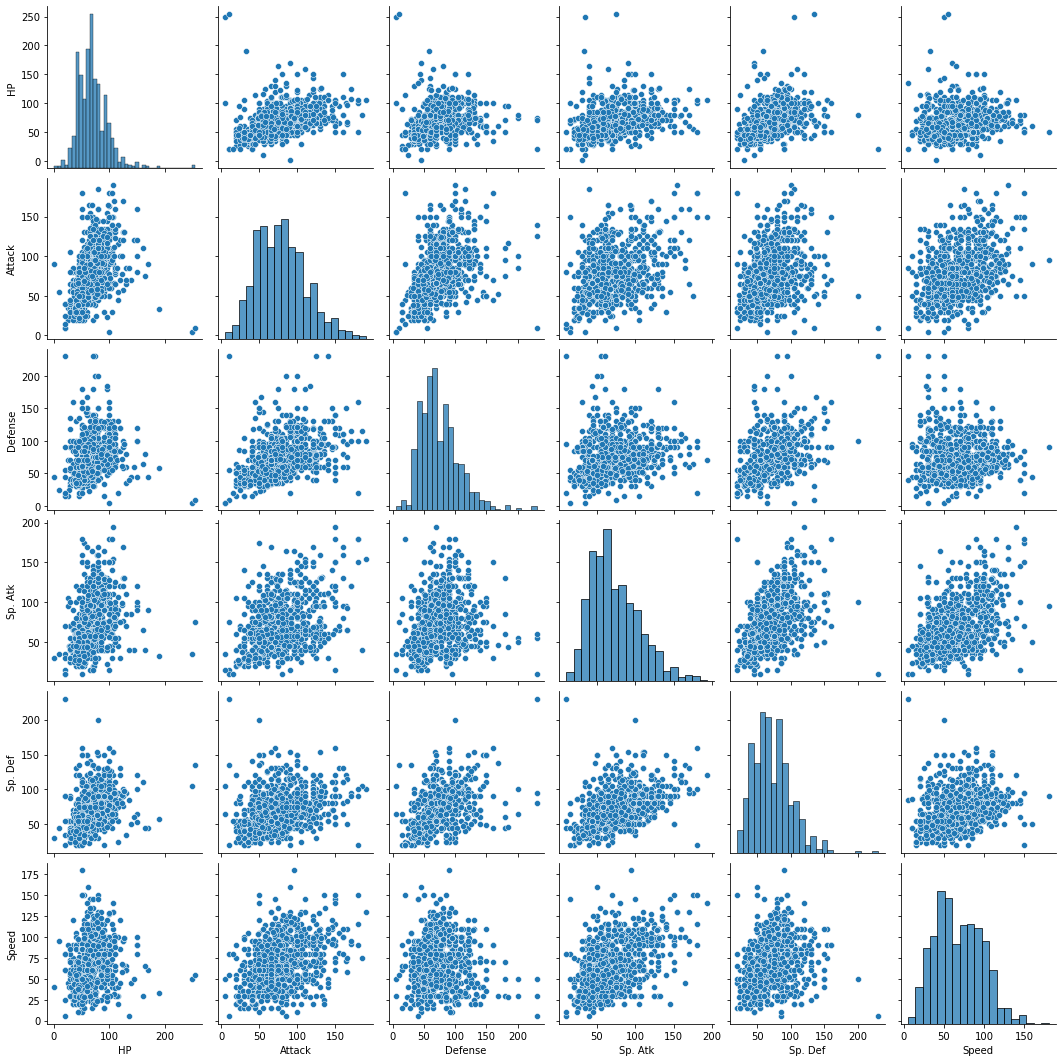

In [58]:
# your code here
sb.pairplot(data=df[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]])

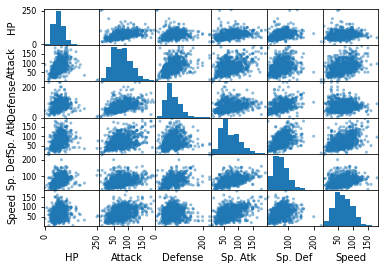

In [60]:
columns = ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]
pd.plotting.scatter_matrix(df[columns]);

In [69]:
types = df["Type 1"].unique()
cs = matplotlib.cm.tab20(np.linspace(0, 1, len(types)))

fmapping = {t: c for t, c in zip(types, cs)}
pd.plotting.scatter_matrix(df[columns], color=df["Type 1"].map(mapping))

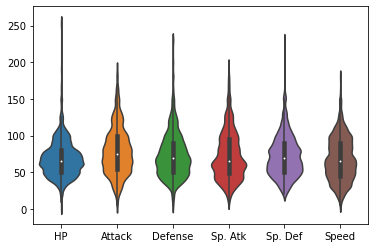

In [72]:
# seaborn has same functionality
sb.violinplot(data=df[columns], bw=0.15);